### Import modules

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

### Load dataset

In [53]:
# searching files
all_files = os.listdir('af_data')

In [109]:
# combining info from all files into one dataframe
data = None

for f in all_files:
    data_f = pd.read_csv(f'af_data/{f}', sep=';')
    
    if data is None:
        data = data_f.copy()
        continue
    
    data = data.append(data_f, ignore_index=True)

### Data understanding

In [57]:
# checking first 5 rows
data.head()

,ДатаЧека,НомерЧека,ВидОперации,АЗСКод,ВидНоменклатуры,Карта,ОсновнаяКарта,НомерСтроки,НоменклатураКод,Количество,Цена,Сумма,Бонусы,СуммаСкидки,УниверсальнаяАкцияКод,СписаноБонусов,СуммаСкидкиДисконт,КассоваяСмена,ОператорКод
0,03.06.2020 00:20:26,26201000001094,Начисление,2620,Сопутка,71557CEEA393407549118FF4FA91EAB3,NaN,1,223154.0,1,44,44,44,0,NaN,0,0,54519072-a514-11ea-afbd-00012eb19ff4,Соболь Наталія Михайлівна
1,03.06.2020 00:20:26,26201000001094,Начисление,2620,Сопутка,71557CEEA393407549118FF4FA91EAB3,NaN,5,206150.0,2,"20,2","40,4",40,0,NaN,0,0,54519072-a514-11ea-afbd-00012eb19ff4,Соболь Наталія Михайлівна
2,03.06.2020 00:20:26,26201000001094,Начисление,2620,Сопутка,71557CEEA393407549118FF4FA91EAB3,NaN,8,198228.0,2,"51,9","103,8",0,0,NaN,0,0,54519072-a514-11ea-afbd-00012eb19ff4,Соболь Наталія Михайлівна
3,03.06.2020 00:20:26,26201000001094,Начисление,2620,Сопутка,71557CEEA393407549118FF4FA91EAB3,NaN,4,123226.0,1,30,30,30,0,NaN,0,0,54519072-a514-11ea-afbd-00012eb19ff4,Соболь Наталія Михайлівна
4,03.06.2020 00:20:26,26201000001094,Начисление,2620,Сопутка,71557CEEA393407549118FF4FA91EAB3,NaN,7,82907.0,2,"35,4","70,8",70,0,NaN,0,0,54519072-a514-11ea-afbd-00012eb19ff4,Соболь Наталія Михайлівна


In [58]:
# info about dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19482 entries, 0 to 19481
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ДатаЧека               19482 non-null  object 
 1   НомерЧека              19482 non-null  int64  
 2   ВидОперации            19482 non-null  object 
 3   АЗСКод                 19482 non-null  int64  
 4   ВидНоменклатуры        19482 non-null  object 
 5   Карта                  19477 non-null  object 
 6   ОсновнаяКарта          54 non-null     object 
 7   НомерСтроки            19482 non-null  int64  
 8   НоменклатураКод        19480 non-null  float64
 9   Количество             19482 non-null  object 
 10  Цена                   19482 non-null  object 
 11  Сумма                  19482 non-null  object 
 12  Бонусы                 19482 non-null  object 
 13  СуммаСкидки            19482 non-null  object 
 14  УниверсальнаяАкцияКод  5074 non-null   float64
 15  Сп

### Preparing and filtering data

In [6]:
data_69 = pd.read_csv('other_data/card_69.csv')
list_69 = list(data_69['Карта'])
fraud_col = []
for index, row in data.iterrows():
    card_num = row['Карта']
    if card_num in list_69:
        fraud_col.append(1)
    else:
        fraud_col.append(0)
data['label'] = fraud_col

In [9]:
set(data['label'])

{0, 1}

##### "ДатаЧека"

We will drop this info as it's not important for the model

In [59]:
# remove column
data = data.drop('ДатаЧека', axis=1)

##### "НомерЧека"

We also will drop this info as it's not important for the model

In [60]:
# remove column
data = data.drop('НомерЧека', axis=1)

##### "ВидОперации"

KeyboardInterrupt: 

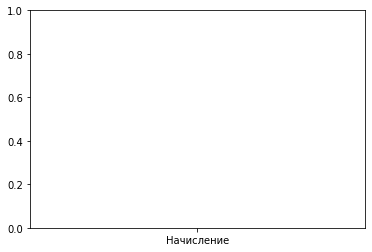

In [12]:
# visualizing data
plt.hist(data['ВидОперации'])
plt.xticks(rotation=45)
plt.show()

As we see we can drop rows with 'Начисление возврат' and 'Начисление оплата возврат' as there are very few data with these values

In [61]:
# filtering rows
data = data[data['ВидОперации']!='Начисление возврат']
data = data[data['ВидОперации']!='Начисление оплата возврат']

In [62]:
# normalize data for learning

# making list with names
list_names = list(data['ВидОперации'].unique())

# replacing string with [0,1]
data['ВидОперации'] = data['ВидОперации'].apply(lambda x:list_names.index(x))

##### "АЗСКод"

In [177]:
len(list_stations)

296

In [65]:
for i in list(data['АЗСКод'].unique()):
    if i not in list_stations:
        list_stations.append(i)

In [63]:
# checking unique values
list(data['АЗСКод'].unique())

[2620,
 2619,
 1946,
 3422,
 2618,
 1921,
 2311,
 1646,
 3409,
 3912,
 1610,
 1609,
 1912,
 3424,
 34295,
 3710,
 3720,
 2615,
 2927,
 1959,
 2617,
 3719,
 1611,
 1952,
 1608,
 3815,
 1630,
 3118,
 2625,
 3126,
 3418,
 3819,
 3115,
 2313,
 2608,
 2110,
 3917,
 2418,
 2622,
 3922,
 3820,
 2322,
 2596,
 2712,
 3809,
 2613,
 3816,
 2310,
 1926,
 2924,
 3916,
 3814,
 2571,
 4210,
 2542,
 2928,
 2537,
 2616,
 2920,
 4119,
 2510,
 2416,
 1955,
 3319,
 2410,
 3040,
 4108,
 1635,
 3725,
 3132,
 1612,
 2420,
 34315,
 2424,
 2563,
 4116,
 2314,
 3308,
 1934,
 1613,
 2717,
 2421,
 3414,
 1958,
 4123,
 2611,
 2321,
 3139,
 2612,
 2426,
 3041,
 2430,
 2711,
 2713,
 1614,
 3312,
 1628,
 2936,
 3123,
 3921,
 3316,
 2917,
 3729,
 2926,
 3708,
 2921,
 3721,
 2610,
 2511,
 3129,
 2932,
 3919,
 2539,
 3027,
 4125,
 2574,
 2614,
 2534,
 2509,
 3714,
 1629,
 2725,
 3127,
 3043,
 3408,
 3723,
 3413,
 1617,
 3423,
 2513,
 2541,
 3824,
 1909,
 2438,
 2523,
 3412,
 3715,
 2530,
 25534,
 1928,
 25533,
 2425,
 2

In [67]:
# normalize data for learning

# making list with names
list_stations = list(data['АЗСКод'].unique())

# replacing string with [0,1,..]
data['АЗСКод'] = data['АЗСКод'].apply(lambda x:list_stations.index(x))

##### "ВидНоменклатуры"

Most fraud cases happen with Gas purchasing, so we will leave only 'Нефтепродукты' rows and remove the entire column

In [68]:
# filtering rows
data = data[data['ВидНоменклатуры']=='Нефтепродукты']

# removing the column
data = data.drop('ВидНоменклатуры', axis=1)

In [69]:
data_card = data.copy()

##### "Карта"

In [70]:
# checking quantity of unique cards 
data['Карта'].describe()

count                                 6389
unique                                 463
top       9B2E468B31B9ADD7C895D2405CE25E47
freq                                   265
Name: Карта, dtype: object

Only 20259 cards used among 47384 operations, this means that some cards were used several times.

Obviously a card number doesn't provide model with any useful information, we will replace the values with numbers of usage frequency for the card.

In [71]:
# grouping by cards
count_card = data.groupby('Карта').count()

#### *bonus

Checking the most frequently used card

In [72]:
# filter card with more than 100 operations
count_card[count_card['ВидОперации']>=100]

,ВидОперации,АЗСКод,ОсновнаяКарта,НомерСтроки,НоменклатураКод,Количество,Цена,Сумма,Бонусы,СуммаСкидки,УниверсальнаяАкцияКод,СписаноБонусов,СуммаСкидкиДисконт,КассоваяСмена,ОператорКод
Карта,,,,,,,,,,,,,,,
68A81CF59724649D8784D322552D2CAE,120,120,0,120,120,120,120,120,120,120,120,120,120,120,120
71557CEEA393407549118FF4FA91EAB3,110,110,0,110,110,110,110,110,110,110,1,110,110,110,110
9B2E468B31B9ADD7C895D2405CE25E47,265,265,0,265,265,265,265,265,265,265,0,265,265,265,265


In [73]:
# showing operations with this card only
card_data = data[data['Карта']=='3A68C9A32E07603A1D5EA7CE1A800EB6']

# grouping by operations quantity per operator 
card_data.groupby('ОператорКод').count()

,ВидОперации,АЗСКод,Карта,ОсновнаяКарта,НомерСтроки,НоменклатураКод,Количество,Цена,Сумма,Бонусы,СуммаСкидки,УниверсальнаяАкцияКод,СписаноБонусов,СуммаСкидкиДисконт,КассоваяСмена
ОператорКод,,,,,,,,,,,,,,,


In [ ]:
# visualizing result
pie_gr = card_data.groupby('ОператорКод').count()
plt.pie(pie_gr['ВидОперации'], labels=pie_gr.index, autopct=lambda pct: int(119*pct/100))
plt.show()

As we can see only one operator "Фера Радміла Іванівна" has done 101 operations with the same card

In [74]:
# replacing the values with numbers of usage frequency
data['Карта'] = data['Карта'].apply(lambda x:count_card.loc[x]['ВидОперации'])

##### "ОсновнаяКарта"

As we saw above this column has only 127 non-null values, so we can drop this column

In [75]:
data = data.drop('ОсновнаяКарта', axis=1)

##### "НомерСтроки"

We will drop this info as it's not important for the model

In [76]:
data = data.drop('НомерСтроки', axis=1)

##### "НоменклатураКод"

We will drop this column as we know that there are only gas products

In [77]:
data = data.drop('НоменклатураКод', axis=1)

##### "Количество", "Цена", "Сумма", "Бонусы", "СуммаСкидки"

These columns we will leave unchanged, just need to convert string into float number

In [78]:
# converting string values to float
data['Количество'] = data['Количество'].apply(lambda x:float(x.replace('\xa0', '').replace(',', '.')))
data['Цена'] = data['Цена'].apply(lambda x:float(x.replace('\xa0', '').replace(',', '.')))
data['Сумма'] = data['Сумма'].apply(lambda x:float(x.replace('\xa0', '').replace(',', '.')))
data['Бонусы'] = data['Бонусы'].apply(lambda x:float(x.replace('\xa0', '').replace(',', '.')))
data['СуммаСкидки'] = data['СуммаСкидки'].apply(lambda x:float(x.replace('\xa0', '').replace(',', '.')))

##### "УниверсальнаяАкцияКод"

In [79]:
# checking unique values
list(data['УниверсальнаяАкцияКод'].unique())

[nan,
 3.0,
 224.0,
 5241.0,
 3068.0,
 4951.0,
 1980.0,
 3067.0,
 4902.0,
 5203.0,
 5175.0,
 294.0,
 4439.0]

In [80]:
# replace NaN values
data['УниверсальнаяАкцияКод'] = data['УниверсальнаяАкцияКод'].fillna(0)

In [81]:
# normalize data for learning

# making list with names
list_disc_types = list(data['УниверсальнаяАкцияКод'].unique())

# replacing string with [0,1,..]
data['УниверсальнаяАкцияКод'] = data['УниверсальнаяАкцияКод'].apply(lambda x:list_disc_types.index(x))

##### "СписаноБонусов"

We will leave this unchanged

In [82]:
# converting unicode string to integer
data['СписаноБонусов'] = data['СписаноБонусов'].apply(lambda x:int(x.replace('\xa0', '')))

##### "СуммаСкидкиДисконт"

In [83]:
# checking for unique values
data['СуммаСкидкиДисконт'].unique()

array([0])

This column has only 0 values, we will drop it

In [84]:
data = data.drop('СуммаСкидкиДисконт', axis=1)

##### "КассоваяСмена"

This values will not help model, let's drop it

In [85]:
data = data.drop('КассоваяСмена', axis=1)

##### "ОператорКод"

In [86]:
# checking for unique values
data['ОператорКод'].unique()

array(['Калита Марія Степанівна', 'Сенежук Іван Юрійович',
       'Булименко Тетяна Миколаївна', 'Демкович Світлана Михайлівна',
       'Бутов Сергій Васильович', "Третьякова Мар'я Андріївна",
       "Куцибала Мар'яна Вікторівна", 'Шведюк Іван Михайлович',
       'Чернишова Ярослава Ярославівна', "Харатін Мар'ян Віталійович",
       'Супрун Ю.                                         ',
       'Ганчева Валерія Михайлівна', 'Цісельська Вікторія Іванівна',
       'Ващук Ірина Богданівна', 'Єлагіна Наталія Володимирівна',
       'Філь Олег Миронович', 'Іванович Юлія Олегівна',
       'Марчук Наталія Володимирівна', 'Любенчук Галина Миколаївна',
       'Небелюк Ольга Михайлівна', "Варцаб'юк Марія Миколаївна ",
       'Гудима Василь Миколайович', 'Писарук Тетяна Леонідівна',
       'Шиманська Людмила Вікторівна', 'Зубрицький Василь Борисович',
       'Супрун Юлія Ігорівна', 'Соболь Наталія Михайлівна',
       'Матуся Анастасія Віталіївна', 'Марчук Альона Ігорівна',
       'Пастух Роксолана Р

In [87]:
# normalize data for learning

# making list with names
list_operators = list(data['ОператорКод'].unique())

# replacing string with [0,1,..]
data['ОператорКод'] = data['ОператорКод'].apply(lambda x:list_operators.index(x))

In [37]:
list_operators.index('Распутний Артур Сергійович')

5

Also dropping the last useless column 'Unnamed: 19'

In [88]:
data = data.drop('Unnamed: 19', axis=1)

KeyError: "['Unnamed: 19'] not found in axis"

##### Normalized dataset for learning model 

In [91]:
data.head(10)

,ВидОперации,АЗСКод,Карта,Сумма,Бонусы,СуммаСкидки,УниверсальнаяАкцияКод,СписаноБонусов,ОператорКод
14,0,12,2,924.25,13209.0,0.00,0,0,0
19,0,14,31,199.98,0.0,42.64,1,0,1
21,1,13,55,1315.00,13155.0,0.44,0,44,2
24,1,15,40,0.25,0.0,286.75,1,23700,3
30,0,13,26,489.80,4700.0,0.00,0,0,2
31,0,13,18,100.00,100.0,0.11,0,0,2
32,1,17,55,0.09,0.0,105.99,0,10608,4
33,0,18,28,451.39,1966.0,0.00,0,0,5
34,0,11,16,1134.33,0.0,166.08,1,0,6
38,0,13,31,200.03,0.0,42.20,1,0,2


In [90]:
data = data.drop('Количество', axis=1)
data = data.drop('Цена', axis=1)

### Training model

In [ ]:
# importing IsolationForest Algorithm
from sklearn.ensemble import IsolationForest

In [ ]:
# creating model
clf = IsolationForest(random_state=0)

In [ ]:
# fit model
clf.fit(data.values)

### Predicting and analyzing result

In [ ]:
# making prediction on the dataset
prediction = clf.predict(data.values)

In [ ]:
# replace 1 for inliers, -1 for outliers with 0 for inliers and 1 for outliers
anomaly = np.where(prediction==-1, 1, 0)

In [ ]:
# adding column to data frame
data_card['Anomaly'] = anomaly

In [ ]:
data['Anomaly'] = anomaly

In [ ]:
# showing result
data.head(10)

In [ ]:
# filter data only for anomaly operations
anomaly_data = data[data['Anomaly']==1]

In [ ]:
# sorting by operator with the highest anomaly operations
anomaly_sorted = anomaly_data.groupby('ОператорКод').count().sort_values('Anomaly', ascending=False)

In [ ]:
# visualizing result
plt.scatter(anomaly_sorted.index, anomaly_sorted['Anomaly'])
plt.plot([0,60], [230,230], color='red')
plt.show()

We can clearly see that in most cases anomaly frequency is below 230, only few are more than that

Let's filter only those operators who are above the line

In [ ]:
# sort only for the highest frequency
anomaly_sorted = anomaly_sorted[anomaly_sorted['Anomaly']>230]
anomaly_sorted

In [ ]:
# getting list of operators names
names = []
for name_index in list(anomaly_sorted.index):
    names.append(list_operators[name_index])

In [ ]:
# getting list of anomaly quantity
cases = list(anomaly_sorted['Anomaly'].values)

In [ ]:
# making dataframe
anomaly_list = pd.DataFrame(data={'Operator':names, 'Anomaly operations':cases})

#### Result

In [ ]:
# showing dataframe
anomaly_list

Here is the list of operators that has more that others suspicious operations

In [ ]:
anomaly_data

In [ ]:
anomaly_sorted = anomaly_data.groupby('Карта').count().sort_values('Anomaly', ascending=False)

In [ ]:
data_card.head()

In [ ]:
data_card.groupby('Карта').count()

In [ ]:
data_card_an = data_card[data_card['Anomaly']==1]

In [ ]:
z = data_card_an[data_card_an['ОператорКод']=='Распутний Артур Сергійович']

In [ ]:
zz = z.groupby('Карта').count().sort_values('Anomaly', ascending=False)

In [ ]:
zz

In [ ]:
data_card_an

In [ ]:
x = data_card_an.groupby('Карта').count().sort_values('Anomaly', ascending=False)

In [ ]:
y = x[x['Anomaly'] > 1]

In [ ]:
y

In [ ]:
cases = list(y['Anomaly'].values)

In [ ]:
cards = list(y.index)

In [ ]:
cards

In [ ]:
cases

In [ ]:
anomaly_list = pd.DataFrame(data={'Карта':cards, 'Количество Анномальных Операций':cases})

In [ ]:
anomaly_list

In [ ]:
anomaly_list.to_csv('anomaly_cards_2.csv')

In [ ]:
oper_numbs = count_card.sort_values('ВидОперации', ascending=False)

In [ ]:
data_card

In [ ]:
oper_numbs.head()

In [ ]:
anomaly_list.head()

In [ ]:
anomaly_list['Процент Анномальных Операций'] = np.nan

In [ ]:
oper_numbs.loc['3A68C9A32E07603A1D5EA7CE1A800EB6']['ВидОперации']

In [ ]:
prc_list = []

In [ ]:
for index, row in anomaly_list.iterrows():
    card_num = row['Карта']
    anomaly_operations_count = row['Количество Анномальных Операций']
    operations_count = oper_numbs.loc[card_num]['ВидОперации']
    anomaly_percent = round((anomaly_operations_count/operations_count)*100,1)
#     print(card_num)
#     print(anomaly_operations_count)
#     print(operations_count)
#     print(anomaly_percent)
    prc_list.append(anomaly_percent)

In [ ]:
prc_list

In [ ]:
anomaly_list['Процент Анномальных Операций (%)'] = prc_list

In [ ]:
anomaly_list.head(30)

In [ ]:
new_an = anomaly_list[anomaly_list['Количество Анномальных Операций'] >= 10]

In [ ]:
new_an = new_an.sort_values('Процент Анномальных Операций (%)', ascending=False)

In [ ]:
new_an

In [ ]:
data_69 = pd.read_csv('other_data/card_69.csv')

In [ ]:
list_69 = list(data_69['Карта'])

In [ ]:
fraud_list = []

In [ ]:
for index, row in new_an.iterrows():
    card_num = row['Карта']
    if card_num in list_69:
        fraud_list.append('True')
    else:
        fraud_list.append('False')

In [ ]:
data_69 = pd.read_csv('other_data/card_69.csv')
list_69 = list(data_69['Карта'])

In [ ]:
len(fraud_list)

In [ ]:
new_an['Подтверждено'] = fraud_list

In [ ]:
zzxx = yyy[yyy['Количество Анномальных Операций'] >= 14]

In [ ]:
yyy = new_an[new_an['Процент Анномальных Операций (%)'] >= 50]

In [ ]:
xxx = zzxx.groupby('Подтверждено').count()
print('accuracy: ',xxx.loc['True']['Карта'] / (xxx.loc['False']['Карта']+xxx.loc['True']['Карта']))

In [ ]:
zzxx

In [ ]:
zzxx.to_csv('anomaly_percent.csv')

In [ ]:
counter = 0

In [ ]:
for index, row in data.iterrows():
    card_num = row['Карта']
    if card_num in list_69:
        counter += 1

In [ ]:
counter

In [ ]:
fraud_col = []

In [ ]:
for index, row in data.iterrows():
    card_num = row['Карта']
    if card_num in list_69:
        fraud_col.append(1)
    else:
        fraud_col.append(0)

In [ ]:
set(fraud_col)

In [ ]:
len(fraud_col)

In [ ]:
data['label'] = fraud_col

In [ ]:
data

In [ ]:
# classification

In [42]:
data.head(10)

,ВидОперации,АЗСКод,Карта,Сумма,Бонусы,СуммаСкидки,УниверсальнаяАкцияКод,СписаноБонусов,ОператорКод,label
0,0,0,34,300.00,1552.0,0.05,0,0,0,0
5,0,2,3,257.90,0.0,32.00,1,0,1,0
9,1,2,2,1049.00,6996.0,0.95,0,95,1,0
10,0,4,7,458.26,1836.0,29.38,1,0,2,0
12,1,5,3,1959.00,13516.0,0.72,0,72,3,0
13,1,6,8,700.00,2643.0,66.21,1,13,4,0
34,1,2,5,1000.00,6454.0,0.05,0,5,1,0
40,1,9,1,1704.09,11070.0,183.34,0,18334,5,0
42,0,4,10,400.00,1506.0,0.13,0,0,2,0
43,0,6,17,500.00,5838.0,0.23,0,0,4,0


In [43]:
data_2 = data.copy()

In [44]:
data_2.head()

,ВидОперации,АЗСКод,Карта,Сумма,Бонусы,СуммаСкидки,УниверсальнаяАкцияКод,СписаноБонусов,ОператорКод,label
0,0,0,34,300.00,1552.0,0.05,0,0,0,0
5,0,2,3,257.90,0.0,32.00,1,0,1,0
9,1,2,2,1049.00,6996.0,0.95,0,95,1,0
10,0,4,7,458.26,1836.0,29.38,1,0,2,0
12,1,5,3,1959.00,13516.0,0.72,0,72,3,0


In [ ]:
fraud_in = []
non_fraud_in = []

In [ ]:
import random

In [ ]:
while len(fraud_in) < 110:
    ind = random.randint(0, 92000)
    try:
        if data.loc[ind]['label'] == 1 and ind not in fraud_in:
            fraud_in.append(ind)
    except:
        continue
        


In [ ]:
len(fraud_in)

In [ ]:
len(non_fraud_in)

In [ ]:
test_data

In [ ]:
test_data = data_2.iloc[:1]

In [ ]:
for i in non_fraud_in:
    test_data = test_data.append(data_2.loc[i])
    data_2 = data_2.drop(i, axis=0)

In [ ]:
test_data.append(data_2.iloc[1])

In [ ]:
test_data

In [ ]:
data_2.loc[5]

In [ ]:
data_2.drop(5, axis=0)

In [ ]:
data_2

In [ ]:
test_data = test_data.reset_index()

In [ ]:
test_data['index']

In [ ]:
test_data = test_data.drop('index', axis=1)

In [ ]:
test_data

In [ ]:
data_2

In [45]:
train_X = data_2.drop('label', axis=1).values

In [46]:
train_X

array([[ 0.,  0., 34., ...,  0.,  0.,  0.],
       [ 0.,  2.,  3., ...,  1.,  0.,  1.],
       [ 1.,  2.,  2., ...,  0., 95.,  1.],
       ...,
       [ 0.,  9.,  3., ...,  3.,  0., 13.],
       [ 0.,  8., 11., ...,  0.,  0., 10.],
       [ 1.,  1.,  1., ...,  0., 60.,  8.]])

In [47]:
train_y = data_2['label'].values

In [48]:
train_y

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
test_X = test_data.drop('label', axis=1).values

In [ ]:
test_X

In [ ]:
test_y = test_data['label'].values

In [ ]:
test_y = test_y.astype(int)

In [49]:
# machine learning
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
linear_svc = LinearSVC(max_iter=10000)

In [ ]:
linear_svc.fit(train_X, train_y)

In [ ]:
y_pred = linear_svc.predict(test_X)

In [ ]:
print(classification_report(test_y, y_pred))
print('-'*50)
print(confusion_matrix(test_y, y_pred))

In [ ]:
knc = KNeighborsClassifier(n_neighbors = 3)
knc.fit(train_X, train_y)

In [ ]:
y_pred = knc.predict(test_X)

In [ ]:
print(classification_report(test_y, y_pred))
print('-'*50)
print(confusion_matrix(test_y, y_pred))

In [ ]:
svc = SVC(gamma='auto')
svc.fit(train_X, train_y)

In [ ]:
y_pred = svc.predict(test_X)

In [ ]:
print(classification_report(test_y, y_pred))
print('-'*50)
print(confusion_matrix(test_y, y_pred))

In [50]:
rfc = RandomForestClassifier(n_estimators=90)
rfc.fit(train_X, train_y)

RandomForestClassifier(n_estimators=90)

In [51]:
y_pred = rfc.predict(train_X)

In [52]:
print(classification_report(train_y, y_pred))
print('-'*50)
print('Confusion Matrix')
print(confusion_matrix(train_y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     46188
           1       1.00      0.99      1.00      1196

    accuracy                           1.00     47384
   macro avg       1.00      1.00      1.00     47384
weighted avg       1.00      1.00      1.00     47384

--------------------------------------------------
Confusion Matrix
[[46187     1]
 [    7  1189]]


In [ ]:
set(y_pred)

In [ ]:
gbc = GradientBoostingClassifier(n_estimators=100, max_depth=1, random_state=0)
gbc.fit(train_X, train_y)

In [ ]:
y_pred = gbc.predict(test_X)

In [ ]:
print(classification_report(test_y, y_pred))
print('-'*50)
print(confusion_matrix(test_y, y_pred))

In [93]:
data.values

array([[0.0000e+00, 1.2000e+01, 2.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [0.0000e+00, 1.4000e+01, 3.1000e+01, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00],
       [1.0000e+00, 1.3000e+01, 5.5000e+01, ..., 0.0000e+00, 4.4000e+01,
        2.0000e+00],
       ...,
       [1.0000e+00, 1.8000e+01, 1.7000e+01, ..., 1.0000e+00, 1.1426e+04,
        4.5200e+02],
       [1.0000e+00, 1.7000e+01, 1.7000e+01, ..., 0.0000e+00, 4.7980e+04,
        2.8000e+01],
       [0.0000e+00, 1.7000e+01, 1.7000e+01, ..., 0.0000e+00, 0.0000e+00,
        2.8000e+01]])

In [94]:
y_pred = rfc.predict(data.values)

In [96]:
set(y_pred)

{0, 1}

In [97]:
data['is_fraud'] = y_pred

In [107]:
fraud_data = data[data['is_fraud'] == 1].copy()

In [108]:
fraud_data

,ВидОперации,АЗСКод,Карта,Сумма,Бонусы,СуммаСкидки,УниверсальнаяАкцияКод,СписаноБонусов,ОператорКод,is_fraud
30,0,13,26,489.80,4700.0,0.00,0,0,2,1
33,0,18,28,451.39,1966.0,0.00,0,0,5,1
184,0,48,31,567.36,2255.0,0.00,0,0,27,1
248,0,17,31,499.80,6000.0,0.00,0,0,28,1
250,0,17,31,1000.10,11544.0,0.00,0,0,28,1
...,...,...,...,...,...,...,...,...,...,...
19016,0,10,26,431.94,3489.0,0.00,0,0,19,1
19102,0,10,31,381.55,1541.0,0.00,0,0,45,1
19158,0,10,29,795.35,3292.0,19.75,1,0,45,1
19226,1,10,30,0.16,0.0,199.78,0,19994,45,1


In [114]:
card_list = []
for i, r in fraud_data.iterrows():
    card_list.append(data.iloc[i]['Карта'])

In [116]:
len(card_list)

317

In [117]:
fraud_data['cards'] = card_list

In [122]:
fraud_data.groupby('cards').count().head()

,ВидОперации,АЗСКод,Карта,Сумма,Бонусы,СуммаСкидки,УниверсальнаяАкцияКод,СписаноБонусов,ОператорКод,is_fraud
cards,,,,,,,,,,
0401A72B85302324BED05E1AFCD810F9,1,1,1,1,1,1,1,1,1,1
0C77616320B5D3B85F43BCD6139181C5,12,12,12,12,12,12,12,12,12,12
17BAFB34E388F683CEEF20769C8541EB,3,3,3,3,3,3,3,3,3,3
1B8AA49E71B4FD7A3907448BC2A07E30,20,20,20,20,20,20,20,20,20,20
1F91429B12A1F1C76423C67B2AC71CBC,19,19,19,19,19,19,19,19,19,19


In [152]:
count_list = []
for i in new_fraud.index:
    count_list.append(new_d.loc[i]['ДатаЧека'])

In [154]:
count_list

[39,
 33,
 65,
 33,
 46,
 34,
 24,
 47,
 40,
 41,
 77,
 26,
 31,
 44,
 38,
 49,
 423,
 32,
 50,
 92,
 21,
 34,
 33,
 44,
 41,
 31,
 31,
 17,
 57,
 33,
 27,
 84,
 27,
 100,
 31,
 56,
 57,
 44,
 104,
 75]

In [129]:
new_d

,ДатаЧека,НомерЧека,ВидОперации,АЗСКод,ВидНоменклатуры,ОсновнаяКарта,НомерСтроки,НоменклатураКод,Количество,Цена,Сумма,Бонусы,СуммаСкидки,УниверсальнаяАкцияКод,СписаноБонусов,СуммаСкидкиДисконт,КассоваяСмена,ОператорКод
Карта,,,,,,,,,,,,,,,,,,
0011B8094C552AD81960B56BF2039B98,137,137,137,137,137,0,137,137,137,137,137,137,137,124,137,137,137,137
00B6E2ADA219D08D4B59EC6B4CF0A583,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1
00EDC46284AF023A0E6DC510A4319853,13,13,13,13,13,0,13,13,13,13,13,13,13,0,13,13,13,13
015F8A839E5BE68299F0E329EBD92870,53,53,53,53,53,0,53,53,53,53,53,53,53,0,53,53,53,53
026FA9180AC8BF5175AEE8826C53D987,66,66,66,66,66,0,66,66,66,66,66,66,66,2,66,66,66,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FB90AEE8F48E89DA21BF0C2A9F87A67F,31,31,31,31,31,0,31,31,31,31,31,31,31,9,31,31,31,31
FC0072BEFC9BDB27F8058B11FEC0B5D5,49,49,49,49,49,0,49,49,49,49,49,49,49,0,49,49,49,49
FCAAC394914C90E00A18F956BB15BF4F,22,22,22,22,22,0,22,22,22,22,22,22,22,3,22,22,22,22


In [132]:
len(set(card_list))

40

In [140]:
new_fraud = fraud_data.groupby('cards').count()

In [155]:
new_fraud['all_oper'] = count_list

In [158]:
final_data = new_fraud[['is_fraud', 'all_oper']]

In [161]:
f = list(final_data.is_fraud)
a = list(final_data.all_oper)

In [165]:
p = []
for i in range(40):
    p.append(round((f[i]/a[i])*100,2))


In [168]:
final_data['fraud_probability'] = p

<ipython-input-168-230ac9336809>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['fraud_probability'] = p


In [173]:
final_result = final_data.sort_values('fraud_probability', ascending=False)

In [174]:
final_result

,is_fraud,all_oper,fraud_probability
cards,,,
9AB6AB9D4CEE40224176EEEECAA13451,20,31,64.52
1B8AA49E71B4FD7A3907448BC2A07E30,20,33,60.61
4C1C5BA3DCD8CD4108E4921202F7F0E7,28,49,57.14
6D03CFFBAD774E73FCDDB9547EBD490B,23,50,46.00
C216042D8E0DAF596FF0E78EF0E28487,12,27,44.44
1F91429B12A1F1C76423C67B2AC71CBC,19,46,41.30
921CACF80C765E3EB9B8195933DAA148,17,44,38.64
0C77616320B5D3B85F43BCD6139181C5,12,33,36.36
DB1EE0DFEB5E9A2BCA805F8E80806F65,20,57,35.09


In [175]:
final_result.to_csv('final_result')